# Lab 01: SoftwareIntro
The purpose of this homework is to guide you through opening the programs you've downloaded through Neurodebian and getting familiar with some of their basic functions.


## Preparation 

### Download example data

We will first download some practice MRI data from open science framework. While this is not a common outlet for scientists to share their MR imaging datasets, this is a useful repository for files that are larger than we would want to put on github and are in a simplified storage format for teaching and demonstrations like this one.

Download from osf: https://osf.io/bprq5/

After clicking on the link, you should see the download __lab01_images.tar.gz__ appear in your browser downloads. We will practice using the bash terminal to navigate to the Downloads folder, and to copy and unpack the download to our lab directory.


In [10]:
%%bash
#^the %% symbols tell the notebook to execute bash commands
cd ~/Downloads  #change directories to the Downloads folder, the ~ is shorthand for "home directory"
ls  #list the files there

In [12]:
%%bash
ls  #now osfshare is a directory, we will go into this directory to practice opening MR images

img
lab01_images.tar.gz
osfshare
SoftwareIntro.ipynb


In [16]:
%%bash
cd osfshare
ls  #list contents

sub-97-T1w_brain_mask.nii.gz
sub-97-T1w_brain.nii.gz
sub-97-T1w_defaced.nii.gz
sub-97_task-flanker_bold.nii.gz


### Preview the data directly in jupyter

We'll first get used to terms about the spatial orientation of an MR image. We'll use a viewer that is part of nipype, which is a collection of neuroimaging tools written in the python programming language. 

More information about the NiftiWidget can be found here: http://nipy.org/niwidgets/examples.html. 

__Import an example image that comes with the package__

In [40]:
#import the widget from the niwidgets package
from niwidgets import NiftiWidget   

#import example data that comes with niwidgets
from niwidgets import examplet1   

#commands that open the image in the widget
#test_widget = NiftiWidget(examplet1)
test_widget.nifti_plotter()

interactive(children=(IntSlider(value=45, continuous_update=False, description='x', max=90), IntSlider(value=54, continuous_update=False, description='y', max=108), IntSlider(value=45, continuous_update=False, description='z', max=90), Dropdown(description='colormap', options=('viridis', 'Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Vega10', 'Vega20', 'Vega20b', 'Vega20c', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spectral', 'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 'winter'), value='viridis'), Output()), _dom_classes=('widget-interact',))

__Import our own image__ <br>
What are some similarities and differences?

In [42]:
#give our anatomical image a variable name
mydata='./osfshare/sub-97-T1w_defaced.nii.gz'

#what exactly does each do below
#mydata_widget = NiftiWidget(mydata)
mydata_widget.nifti_plotter()

interactive(children=(IntSlider(value=119, continuous_update=False, description='x', max=239), IntSlider(value=127, continuous_update=False, description='y', max=255), IntSlider(value=127, continuous_update=False, description='z', max=255), Dropdown(description='colormap', options=('viridis', 'Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Vega10', 'Vega20', 'Vega20b', 'Vega20c', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spectral', 'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 'winter'), value='viridis'), Output()), _dom_classes=('widget-interact',))

The images we have been viewing are high-resolution images using [T1 contrast](http://www.med.harvard.edu/aanlib/basicsMR.html), and the image format is [nifti](https://brainder.org/2012/09/23/the-nifti-file-format/). As you see above, the image is 3-dimensional and can be opened in 3 orthogonal views simultaneously; coronal, sagittal and axial views.The viewer above is useful for getting familiar with the x,y,and z "planes" of the iamge. Every 3-dimensional pixel in the image (called a voxel) has a unique x,y,z coordinate.  <br>
<br>
It is also common to refer to different parts of the image by their location in neuroanatomical terms: L, R, A, P, S, I (Left, Right, Anterior=front, Posterior=back, Superior=top, Inferior=bottom). We will see that some viewers will show us these labels and "Left" in the image is not always the "Left" part of the head! <br>
<br>
It may be obvious, but also note that in these images we cannot see at the level of single neurons. The anatomy we focus on with MRI is from a "macroscopic" view. 


## FSL package viewer

A very common neuroimaging package is FSL. FSL has viewer that we can open in the bash terminal, and it has some very helpful features for understanding more about images.

__We'll first see how to:__ <br>
<br>
__(a) learn basic information about the image attributes__ <br> 
-What kind of image is this <br>
-What is the voxel size <br>
-Others? <br>
<br>
__(b) look at the image histogram.__ <br>
An image histogram shows the distribution of all the intensity values that make up the image. Looking at these is helpful to see what intensities are generally “brain” versus background and to get comfortable with the idea that images are a collection of voxels with different intensity values (e.g., see Handbook Figure 2.1, p14). The intensity values mean something about what tissue we *think* we’re seeing based on the physics of MRI. It is also helpful to remember that the basis of most image processing tools is signal processing and statistics on these intensity values to improve the detection of the "signal" we're interested in (e.g., brain structure or activity) from noise (e.g., motion). <br>
-What is the range of values in our sub-97-T1w_defaced.nii.gz image <br>
-Is the histogram multi-modal? What would that tell us?  <br>
-What are the typical values for gray matter, white matter, and CSF? <br>
<br>
__(c) look at our functional image and its timeseries.__ <br>
-Compare and contrast the image intensities of white matter and gray matter from the structural with the functional image. <br>
-Show the image timeseries <br>
-Show the movie of volumes over time, how many dimensions is the file? <br>
-Compare the spatial resolution of the structural and functional <br>
-Can we overlay the functional on top of the structural image? <br>

In [47]:
%%bash

#the viewer version we'll use is called fslview, you can open it without opening an image by typing fslview
#fslview
pwd

/home/brain/Labs/01-Lab


## Image meta-data

In addition to the information in the image, another important aspect of data with the images is their meta-data (Handbook, p14). This information is often stored in a [header] (http://nipy.org/nibabel/nibabel_images.html#the-image-header) that is tagged onto the image file itself or as a separate file. For nifti images the header information is kept tagged onto the image itself, so it is a handy to know how to look at the header for images on the command line. We'll see how to do this with fsl and nibabel below.

In [57]:
import nibabel as nb
import os

#below is a different way to assign variable names to directories and files
datadir="./osfshare/"
anat_file=os.path.join(datadir,"sub-97-T1w_brain.nii.gz")
anat_file
anat_image=nb.load(anat_file)
func_file=os.path.join(datadir,"sub-97_task-flanker_bold.nii.gz")
func_file
func_image=nb.load(func_file)

In [63]:
#look at metadata for dimensions of our image, compare to what we saw with fslview
anat_image.shape  

(240, 256, 256)

In [67]:
#header
anat_image.header  #this is the header object
print(anat_image.header)  #print it to the screen

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 120.17796325683594
qoffset_y       : -91.97175598144531
qoffset_z       : -109.59886169

## Coordinate systems and affines

As described in the Handbook (Ch 1), images are arrays of numbers. We also need to consider how that image is positioned in space, and we'll get a more hands-on look at this information here. Many of these examples are used from this excellent reference on [arrays](http://nipy.org/nibabel/coordinate_systems.html). In particular, be sure we discuss the [naming of reference spaces](http://nipy.org/nibabel/coordinate_systems.html#naming-reference-spaces) in relation to what we see below.

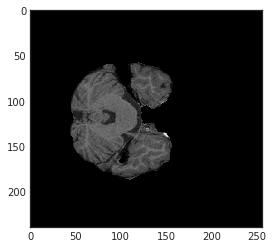

In [114]:
#let's plot the image with the coordinate system viewable
import pylab as plt
import seaborn as sns

#anat_image.shape

#the get_data() function allows us to access the actual data in the image object. This will load the image data into memory. 
data=anat_image.get_data()

#try these different commands, what is happening here?

plt.imshow(data[:,:,89],cmap="gray")
#plt.imshow(data[160,:,:],cmap="gray")
#plt.imshow(data[:,104,:],cmap="gray")


In [111]:
%%bash
#now let's use fslview to visually compare coordinates for the image in voxel space (voxels) and scanner space (mm) 
#do you remember how to open fslview from the command line?

Using matrices to represent the spatial transformations between different image "spaces". Review this [explanation](http://nipy.org/nibabel/coordinate_systems.html#the-affine-matrix-as-a-transformation-between-spaces) which complements and extends the information in the Handbook Box 2.3.1.

In [112]:
#look at affine array for our anatomical image
#this  maps the voxel coordinates to scanner coordinates
anat_image.affine

array([[  -1.        ,    0.        ,    0.        ,  120.17796326],
       [   0.        ,    1.        ,    0.        ,  -91.97175598],
       [   0.        ,    0.        ,    1.        , -109.59886169],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [116]:
%%bash

#let's change the orientation of the image and see how it affects the affine matrix
#show usage of fslswapdim, need commandline access to fsl


<br>
## Practice problems 

Below we list some practice problems to review what we've learned.

1) Extract the dimensions of the functional image using nipype commands as we did for the anatomical above. Show your work below. Explain what the dimensions are and what they mean in words. (e.g., "The dimensions of each volume are --- and the were --- volumes in the timeseries"). 

2) Compare the image intensity values for the structural and functional image for the same brain tissue types. What tissues are brightest in the T1-weighted structural image? How does this compare to the intensities in the T2-weighted functional image. Use a code cell below to give an example from a given coordinate, and explain your answer in words in the following markdown cell. It may also help to refer to Ch2 in our Handbook text. 

3) Use what we learned about affine representations for images to explain why there a *-1* in the the [1,1] affine matrix element for our T1-weighted image, and what the values in column 4 refer to. YOu may wish to demonstrate with fslswapdim but only if you want to!